<a href="https://colab.research.google.com/github/merdogan97/DL_Deep-Learning/blob/main/DL_S2_(Installing_Tensorflow_%26_Keras_Syntext_Basics_fake_reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.7.13


In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
tf.__version__

'2.8.2'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [9]:
df = pd.read_csv("/content/fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [10]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


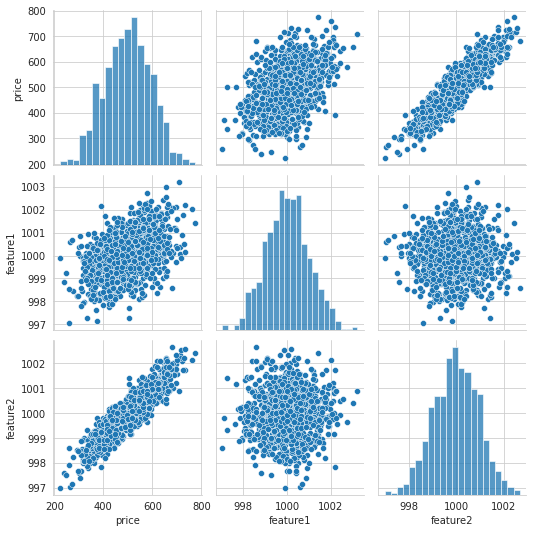

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [17]:
X = df[['feature1', 'feature2']]
y = df['price']

In [18]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [19]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
X_train.shape

(700, 2)

In [22]:
X_test.shape

(300, 2)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [27]:
import tensorflow as tf

In [76]:
from tensorflow.keras.models import Sequential # TÜM LAYERLAR ARKA ARKAYA DİZİLİR
from tensorflow.keras.layers import Input,Dense, Activation # 

In [ ]:
help(Sequential)

In [ ]:
help(Dense)

In [31]:
X_train.shape

(700, 2)

In [32]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [77]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1])) # input dim : sırf bu inputları almak için atamıyoruz. sebep; modelin parametremelerini eğitime başlamadan kontrol edebilmemmizi (böylece kaç adet input geleceğini bilir )  sağlıyor
model.add(Dense(units = 4, activation = "relu")) # %99 relu kullanacağız
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.59101653, -0.4356947 ,  0.9987354 , -0.33815026],
        [ 0.6344085 ,  0.2152586 ,  0.82017946, -0.18576956]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.01726061, -0.4518192 ,  0.07265973, -0.47323123],
        [-0.61924815,  0.23928565, -0.17069745,  0.26829773],
        [ 0.46290928, -0.0984565 , -0.24570256, -0.19601643],
        [-0.8003694 ,  0.6135196 ,  0.16037112, -0.17394304]],
       dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.8092142 , -0.4872768 ,  0.34926683,  0.7197452 ],
        [-0.39528573,  0.74456686,  0.4803396 , -0.0329836 ],
        [ 0.49448138, -0.5586306 , -0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [79]:
model.compile(optimizer = "rmsprop", loss = "mse") # şuan eğitime hazır

In [80]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250) # her seferinde 32 örnek işleme geçer
                                                                    # 700/32 = 21.75=22 iterasyon var.

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256831.3438
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256705.4688
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256605.3281
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256525.0312
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256445.9219
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256352.5781
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256244.4375
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256121.2500
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255982.7188
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255826.6250
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255652.1875
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 2.1307576 ,  2.9411843 , -1.0085992 , -0.6208787 ],
        [ 5.291772  ,  4.956908  ,  0.2711184 , -0.46075892]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 1.0446181 ,  1.0336883 , -0.13882263,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.1677626 , -0.18886875,  3.706915  , -0.54376054],
        [-0.50056267,  0.18912286,  3.5066297 , -0.5942428 ],
        [ 0.11744003,  0.09227919, -0.49421903,  0.11281115],
        [-0.19875884,  0.13317943,  0.85710293, -0.31631672]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([-0.03458397, -0.1602349 ,  1.0468953 ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-4.0004671e-01, -3.0952257e-01, -2.6118425e-01, -3.3951935e-01],
        [ 4.2296347e

In [72]:
model.history.history

{'loss': [133.81268310546875,
  126.49187469482422,
  119.6229248046875,
  113.77935028076172,
  108.87052154541016,
  103.7121353149414,
  99.35292053222656,
  94.5188980102539,
  89.87899017333984,
  85.46088409423828,
  81.44384765625,
  76.8927993774414,
  72.72543334960938,
  68.8882827758789,
  64.94100189208984,
  62.56147384643555,
  59.241485595703125,
  56.07683181762695,
  53.1112174987793,
  50.29816436767578,
  48.1212272644043,
  45.84355545043945,
  43.50235366821289,
  41.555030822753906,
  40.017181396484375,
  37.39320755004883,
  36.57138442993164,
  35.31140899658203,
  33.85300064086914,
  32.59660720825195,
  31.88009262084961,
  30.598766326904297,
  29.88654899597168,
  29.083477020263672,
  28.191640853881836,
  27.87506103515625,
  27.519929885864258,
  27.258037567138672,
  26.63677978515625,
  26.239904403686523,
  26.0967960357666,
  25.772201538085938,
  25.524553298950195,
  25.422748565673828,
  24.961816787719727,
  24.809280395507812,
  24.837108612060

In [73]:
pd.DataFrame(model.history.history)

,loss
0,133.813
1,126.492
2,119.623
3,113.779
4,108.871
...,...
245,24.228
246,24.361
247,24.119
248,23.836


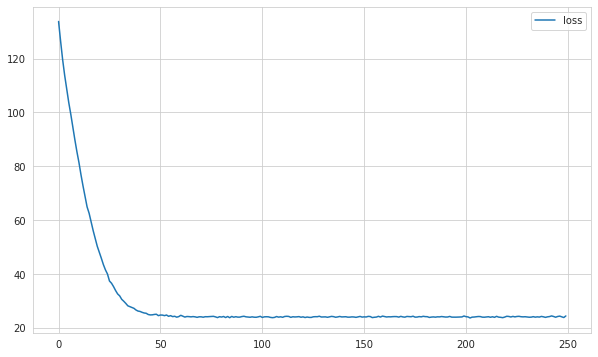

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

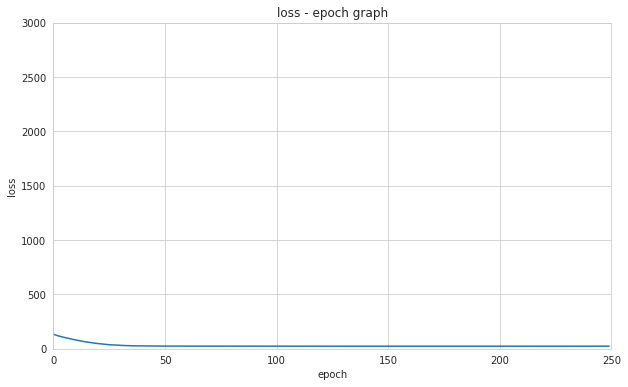

In [75]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
model.evaluate(X_train, y_train, verbose=0)

137.97023010253906

In [46]:
model.evaluate(X_test, y_test, verbose=0)

133.7227020263672

In [47]:
y_pred = model.predict(X_test)

In [48]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
235,593.668,598.637
10,624.247,612.830
495,576.893,568.027
596,516.986,517.981
867,502.902,510.415
81,468.357,474.032
306,528.129,528.559
2,410.297,411.798
155,410.538,421.499
249,599.924,592.303


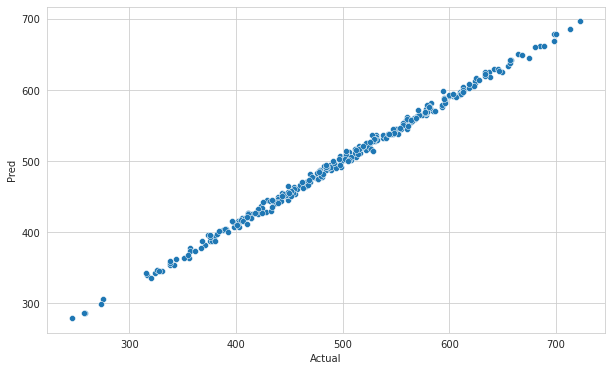

In [49]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [50]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [51]:
eval_metric(y_test, y_pred)

r2_score: 0.9847904656610355 
mae: 9.300237945722431 
mse: 133.72270752435787 
rmse: 11.563853489402133


## Final Model and Model Deployment

### Final Model Training

In [52]:
scaler = MinMaxScaler().fit(X)

In [53]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [54]:
X_scaled = scaler.transform(X)

In [55]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)  # bütün data üzeirnde eğitime sokarım

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257446.1250
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257352.9375
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 257207.0156
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 257055.8281
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 256882.1406
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 256672.5625
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 256421.9062
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 256130.0312
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 255791.2656
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 255399.3125
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 254945.8281
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [56]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [57]:
#final_model.save("model_fake_reg") 

### Loading Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model_fake_reg = load_model('model_fake_reg.h5')

In [60]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [61]:
sample = [[998, 1000]]  # tek örnek olsa bile df olarak vermemiz gerekir.

In [62]:
sample_scaled = scaler_fake_reg.transform(sample)  # transform ederiz

In [63]:
model_fake_reg.predict(sample_scaled)  # predict alıyoruz

array([[419.05695]], dtype=float32)

## Prediction-2

In [64]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [65]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [66]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [67]:
model_fake_reg.predict(sample_scaled)

array([[378.99838],
       [330.67422],
       [282.35007],
       [234.02591],
       [185.70174]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___